In [5]:
import numpy as np

import kex_datasets as kex
import petlink
import pet_scan

NameError: name 'tof_bin_time_s' is not defined

In [4]:
A = [109,109+97,109+2*97]
B = 109
print(np.searchsorted(A, B, side='left'))

0


In [3]:
listmode_dataset, listmode_paths = kex.listmode()

In [4]:
data_number=3
timetags = petlink.timetag_indices(listmode_dataset[data_number])
print(timetags)
print(len(listmode_dataset[data_number]))

[     483     1106     1733 ... 37393555 37394165 37394798]
37394799


In [5]:
A = [1,2,3]
print(np.split(A, (1,),axis=-1))

[array([1]), array([2, 3])]


In [11]:
events = petlink.events(listmode_dataset[data_number])
proj_bins = petlink.binAddressToProjectionSpace(events)
bin_addresses = petlink.bin_address(events)
unravel_ba = np.unravel_index(bin_addresses, dims=pet_scan.HISTOGRAM_SHAPE, order='C')
print(proj_bins.shape)
print(np.array(unravel_ba).shape)

(4, 37332165)
(4, 37332165)


In [12]:
print(proj_bins[:,:10])
print(np.array(unravel_ba)[:,:10])

[[ 10   1   8   0   2   1   6   6   3   5]
 [154 423 397 318 337 527 404 484 326 462]
 [  4  85   8  92  58  92  26   6 148 159]
 [205 236 211 262 268 277 231 209 230 214]]
[[ 10   1   8   0   2   1   6   6   3   5]
 [154 423 397 318 337 527 404 484 326 462]
 [  4  85   8  92  58  92  26   6 148 159]
 [205 236 211 262 268 277 231 209 230 214]]


In [13]:
diff = proj_bins - np.array(unravel_ba)
print(np.sum(diff))

0


In [7]:
print(np.unravel_index.__doc__)

unravel_index(indices, dims, order='C')

    Converts a flat index or array of flat indices into a tuple
    of coordinate arrays.

    Parameters
    ----------
    indices : array_like
        An integer array whose elements are indices into the flattened
        version of an array of dimensions ``dims``. Before version 1.6.0,
        this function accepted just one index value.
    dims : tuple of ints
        The shape of the array to use for unraveling ``indices``.
    order : {'C', 'F'}, optional
        Determines whether the indices should be viewed as indexing in
        row-major (C-style) or column-major (Fortran-style) order.

        .. versionadded:: 1.6.0

    Returns
    -------
    unraveled_coords : tuple of ndarray
        Each array in the tuple has the same shape as the ``indices``
        array.

    See Also
    --------
    ravel_multi_index

    Examples
    --------
    >>> np.unravel_index([22, 41, 37], (7,6))
    (array([3, 6, 6]), array([4, 5, 1]))
    >>>

In [19]:
print(np.unravel_index(np.array([1,1],dtype=np.int32), (1,2)))
print(np.squeeze(np.array(np.unravel_index([1],(1,2)))))

(array([0, 0], dtype=int64), array([1, 1], dtype=int64))
[0 1]


In [1]:
print(10)

10


In [2]:
shape = [2,3,5]
A = np.arange(np.prod(shape))


NameError: name 'np' is not defined

In [2]:
len({'a':1})

1

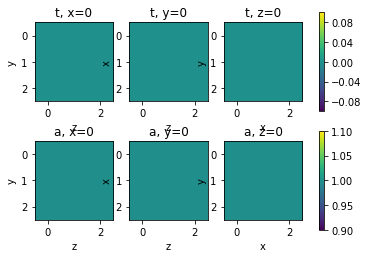

In [21]:
import visual
import importlib
import numpy as np
importlib.reload(visual)
visual.plot_multi_images({'t': np.zeros((3,3,3)),
                         'a': np.ones((3,3,3))}, 
                         ['x','y','z'], 
                         [0,0,0])

In [38]:
def swap(seq, pair):
    seq[pair[0]], seq[pair[1]] = seq[pair[1]], seq[pair[0]]
    return seq

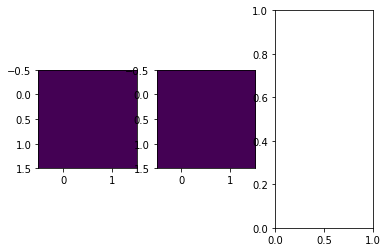

In [88]:
import matplotlib.pyplot as plt
image = np.zeros((2,2,2))
dimpairs = [(0,1), (1,0)]
position = [0,0,0]
fig, axes = plt.subplots(ncols=3)
dimlabels = 'zyx'
plot_views(image, dimpairs, position, dimlabels, axes)

In [39]:
swap([1,2,3], (0,2))

[3, 2, 1]

In [81]:
size=2
ndims=3
A = np.reshape(np.arange(size**ndims), 
               newshape=(size,)*ndims)
print(A)
#print(A[(0,...)])
#print(A[(...,0)])
#print(A[(...,0)])
#print(A[(-1,)])
print(A[(slice(2), 0,slice(2))])
print(A[(slice(2), slice(2), 0)])
print(A[(1,1,0)])

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
[[0 1]
 [4 5]]
[[0 2]
 [4 6]]
6


In [60]:
axes

[[1, 2, 3]]

In [70]:
labels = ('x', 'y', 'z')
values =[1,2,3]
d = dict(zip(labels, values))
for a in d.items():
    print(a)

('x', 1)
('y', 2)
('z', 3)


[array([2, 3, 4])]


In [90]:
import kex_data

In [91]:
recons = kex_data.get_recon()

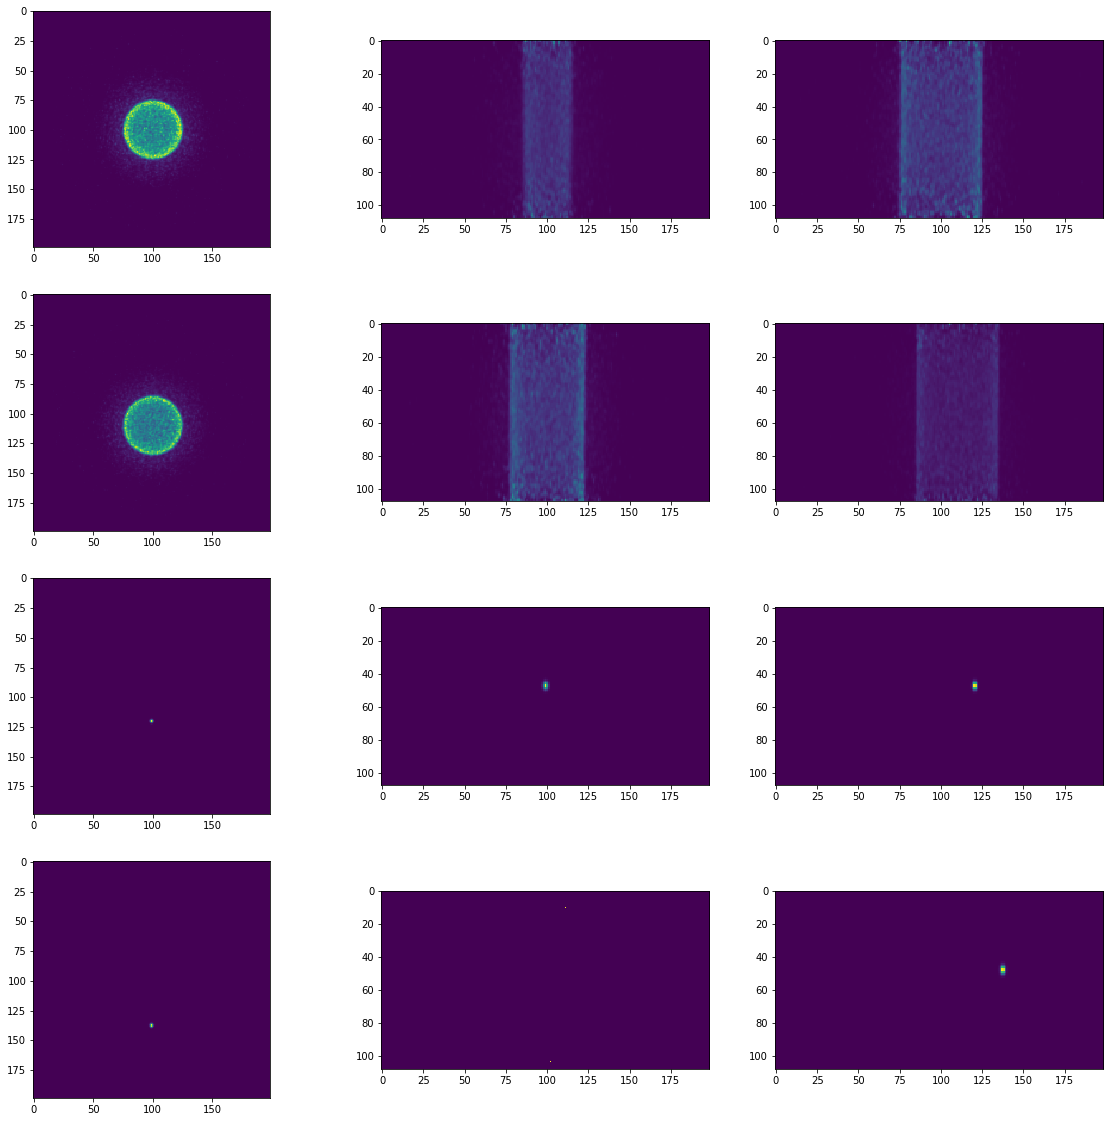

In [128]:
fig, axes = plt.subplots(nrows=4, 
                         ncols=3, 
                         figsize=(20,20))
for dkey, row in zip(recons, axes):
    viewpairs = [(2,1), (0,2), (0,1)]
    position = [50,120,100]
    vv.plot_views(recons[dkey], position, viewpairs, row)

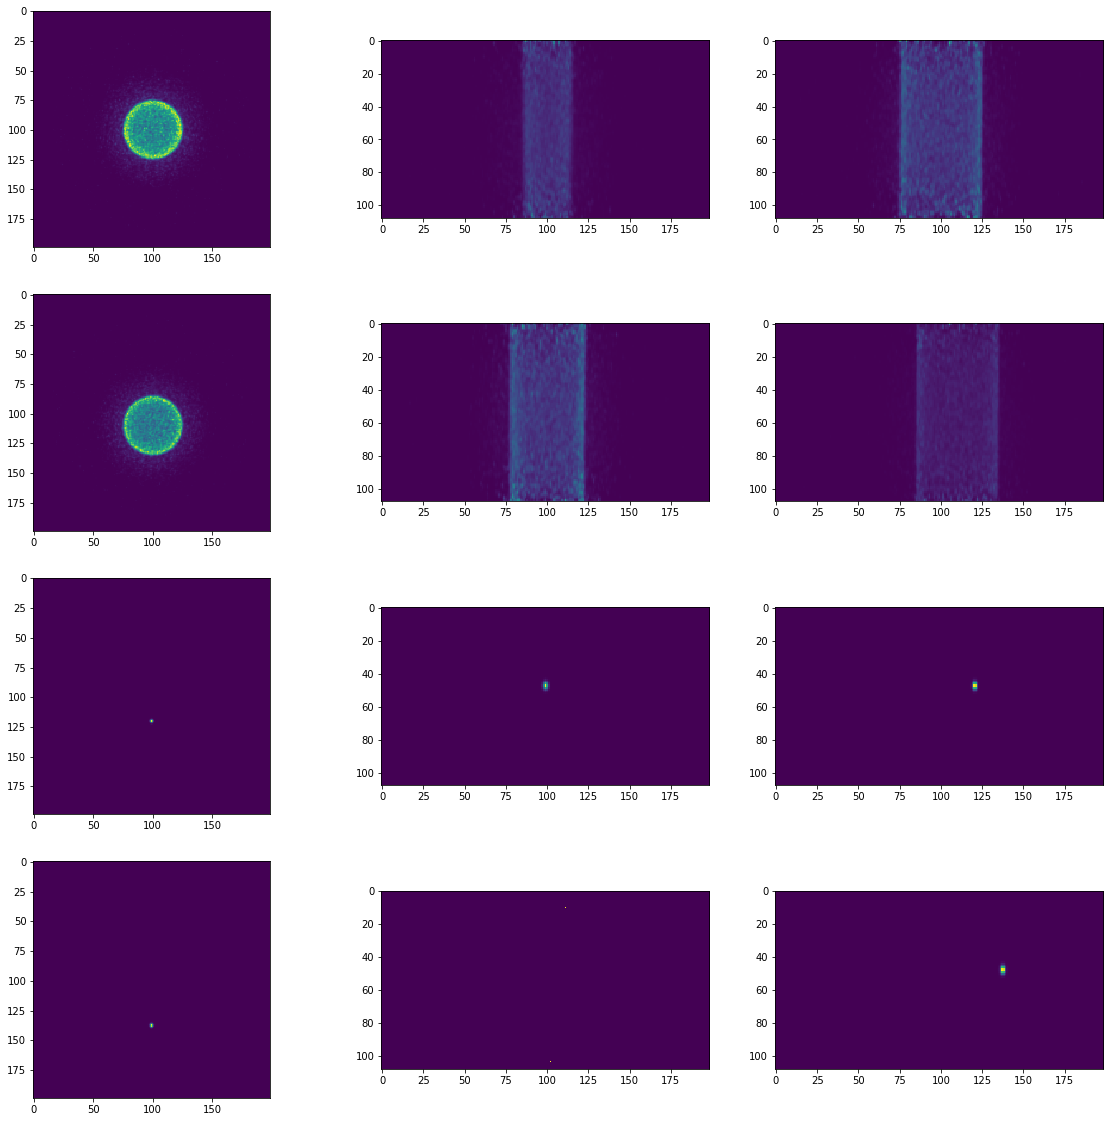

In [122]:
fig, axes = plt.subplots(nrows=4, 
                         ncols=3, 
                         figsize=(20,20))
for dkey, row in zip(recons, axes):
    viewpairs = [(2,1), (0,2), (0,1)]
    dimlabels = 'zyx'
    position = [50,120,100]
    plot_views(recons[dkey], viewpairs, position, dimlabels, row)

In [123]:
def plot_views(image, viewpairs, position, dimlabels,axes):    
    for ax, viewpair in zip(axes, viewpairs):
        index = position.copy()
        for k in range(2):
            dim = viewpair[k]
            index[dim] = slice(-1)
        index = tuple(index)
        ax.imshow(image[index])

In [140]:
import volume_view as vv
importlib.reload(vv)

<module 'volume_view' from 'C:\\Users\\petct\\Desktop\\Hugo\\Code\\PythonMEX\\volume_view.py'>

In [141]:
max([(0,1), (2,3), (0,4)])

(2, 3)

In [142]:
pos_strings = vv.get_position_strings([1,2,3,4], [(0,1), (1,), (0,1,2)])

In [143]:
for p in pos_strings:
    print(p)

(:, :, 3, 4)
(1, :, 3, 4)
(:, :, :, 4)


In [144]:
print(A)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices